In [46]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from time import time
from minisom import MiniSom
from tfsom import tfsom

## Read Data

In [28]:
data = pd.read_csv("data.csv", sep=";", index_col=0)
print(data)

           00       000    000eur  0012  0043  00508655  00508662  00508663  \
0    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
1    0.000000  0.032377  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
2    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
3    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
4    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
5    0.000000  0.061123  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
6    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
7    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
8    0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
9    0.000000  0.064443  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
10   0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.000000    0.0000   
11   0.000000  0.000000  0.000000   0.0   0.0  0.000

## Do Clustering

In [31]:
t0 = time()
km = KMeans(n_clusters=10, random_state=0).fit(data)
print("Clustering sparse data with %s" % km)
print()

# We don't have a ground truth
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
#print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
#print("Adjusted Rand-Index: %.3f"
#      % metrics.adjusted_rand_score(labels, km.labels_))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()




Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)




## Print Top Terms per Cluster

In [49]:
print("Top terms per cluster:")

    #if opts.n_components:
    #    original_space_centroids = svd.inverse_transform(km.cluster_centers_)
    #    order_centroids = original_space_centroids.argsort()[:, ::-1]
    #else:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Top terms per cluster:
Cluster 0: telekom mobile iot deutsche inspire europes big a1 commitment pension
Cluster 1: type address rewe walter addresslocality neudorf name logo ag risk
Cluster 2: radar infineon safety automotive microcontrollers verification semiconductors reducing vehicles electric
Cluster 3: dynatrace type address linz 4040 name addresslocality monitoring logo transportation
Cluster 4: address atos type name postal addresslocality vienna region country logo
Cluster 5: software development experience data team java technologies knowledge web good
Cluster 6: spar retail salzburg ics eight runs centers smoothly fashion everything
Cluster 7: security management experience xe2x80xa2 project accenture work information development knowledge
Cluster 8: red bull media data see sales youll fuschl marketing advertising
Cluster 9: data business experience development team analysis management skills knowledge working


## SOM Example

In [40]:
som = MiniSom(20, 30, 8292, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
print("Training...")
som.train_random(data.values, 100) # trains the SOM with 100 iterations
print("...ready!")


Training...
...ready!


In [57]:
with open("./minisom.save", "w") as f:
    f.write("SOM {} {} {} {} {} {}\n".format(20, 30, 8292, 100, 0.5, 0.3))
    for i in som.get_weights():
        for j in i:
            f.write(" ".join(map(str, j)) + "\n")

In [60]:
mysom = tfsom.SOM.load_trained_som("./minisom.save")

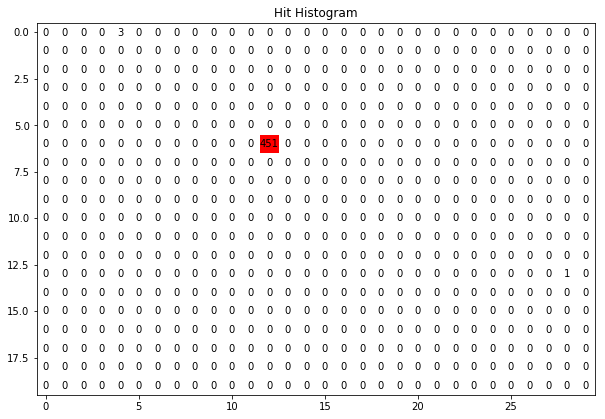

In [59]:
mysom.plot_hit_histogram(data.values)


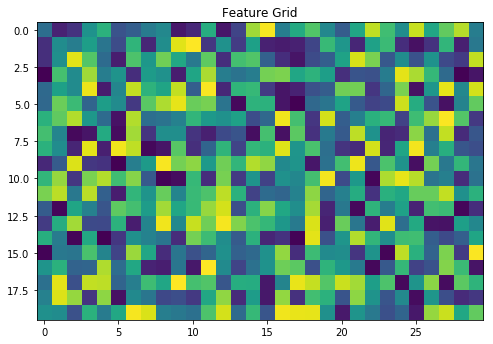

In [62]:
mysom.plot_feat_grid(100)

## KMeans Clustering Example from SciKit Docu

In [12]:
from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()


2018-04-05 21:33:59,839 INFO Downloading 20news dataset. This may take a few minutes.
2018-04-05 21:33:59,843 INFO Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer
done in 1.554999s
n_samples: 3387, n_features: 10000

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_